## Programming Assignment 2: Logisitic Regression
> From Machine Learning Course at [coursera.org](https://www.coursera.org/learn/machine-learning/programming/ixFof/logistic-regression)

<sup>Note: run cells in the same (labeled) order, starting from **solutions** cells at the bottom of the page</sup>

<hr>
# First: Logistic Regression with Linear Classifier
predict whether a student gets admitted into a university.
<hr>

##### Data

In [9]:
!head machine-learning-ex2/ex2/ex2data1.txt

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1
45.08327747668339,56.3163717815305,0
61.10666453684766,96.51142588489624,1
75.02474556738889,46.55401354116538,1
76.09878670226257,87.42056971926803,1
84.43281996120035,43.53339331072109,1


In [10]:
#%% Load Data
#%  The first two columns contains the exam scores and the third column
#%  contains the label.
data = np.loadtxt('machine-learning-ex2/ex2/ex2data1.txt', delimiter=',')
x = data[:,:2]
y = data[:,2]

## Part 1: Plotting

Plotting data with o indicating (y = 1) examples and x indicating (y = 0) examples.



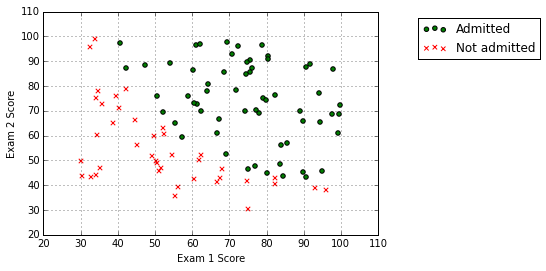

In [11]:
#%% ==================== Part 1: Plotting ====================
#%  We start the exercise by first plotting the data to understand the 
#%  the problem we are working with.
print('Plotting data with o indicating (y = 1) examples and x indicating (y = 0) examples.\n')
plotData(x, y)

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted', 'Not admitted'], bbox_to_anchor = (1.5, 1))
plt.show()

## Part 2: Compute Cost and Gradient

In [12]:
#%% ============ Part 2: Compute Cost and Gradient ============
#%  In this part of the exercise, you will implement the cost and gradient
#%  for logistic regression. You neeed to complete the code in costFunction()

#%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = x.shape

#% Add intercept term to x and X_test
ones = np.ones(m)
X = np.array([ones, x[:,0], x[:,1] ]).T

#% Initialize fitting parameters
initial_theta = np.zeros(n + 1)

#% Compute and display initial cost and gradient
cost = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros):\n{}'.format(cost))
print('Gradient at initial theta (zeros):\n{}'.format(initial_theta))

Cost at initial theta (zeros):
0.69314718056
Gradient at initial theta (zeros):
[ 0.  0.  0.]


## Part 3: Optimizing

Using either **`fmin()`** or **`minimize()`** from `scipy.optimize`, they are equally the same, see below 

In [13]:
# ============= Part 3: Optimizing using fmin() or minimize()
# %  In this exercise, you will use a built-in function (scipy.optimize.fmin) to find the
# %  optimal parameters theta.
f = lambda t: costFunction(t, X, y)

In [14]:
# %  Set options for fmin()
fmin_opt = {'full_output': True, 'maxiter': 400, 'retall': True}
# %  Run fmin to obtain the optimal theta
theta, cost, iters, calls, warnflag, allvecs = fmin(f, initial_theta, **fmin_opt)
print('Cost at theta found by fmin(): {}'.format(cost))
print('theta: {}'.format(theta))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Cost at theta found by fmin(): 0.20349770159
theta: [-25.16130062   0.20623142   0.20147143]


In [15]:
# %  Set options for minimize()
mini_opt = {'maxiter': 400, 'disp': True}
# %  Run minimize to obtain the optimal theta
results = minimize(f, initial_theta, method='Nelder-Mead', options=mini_opt)
cost = results['fun']
theta = results['x']
print('Cost at theta found by minimize(): {}'.format(cost))
print('theta: {}'.format(theta))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Cost at theta found by minimize(): 0.20349770159
theta: [-25.16130062   0.20623142   0.20147143]


##### Visualize the cost function

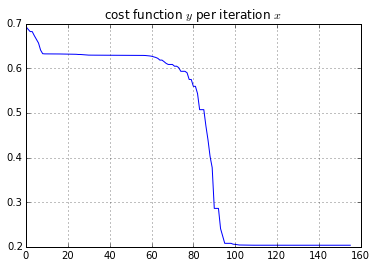

In [16]:
cost_change = [costFunction(allvecs[i], X, y) for i in range(156)]
plt.plot(cost_change)
plt.grid();plt.title('cost function $y$ per iteration $x$');plt.show()

##### Plot the decision boundary

Cost at theta found by fmin:
0.20349770159

theta: 

[-25.16130062   0.20623142   0.20147143]



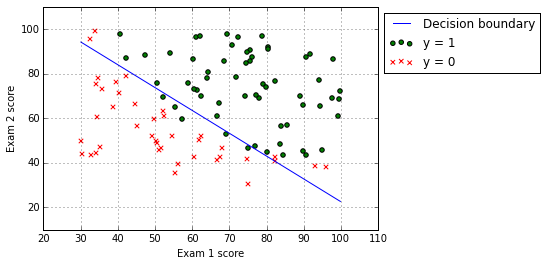

In [17]:
# % Print theta to screen
print('Cost at theta found by fmin:\n{}\n'.format(cost))
print('theta: \n')
print('{}\n'.format(theta))

# % Plot Boundary
plotDecisionBoundary(theta, X, y)

# % Show plot
plt.show()

## Part 4: Predict and Accuracies

In [18]:
# %% ============== Part 4: Predict and Accuracies ==============
# %  After learning the parameters, you'll like to use it to predict the outcomes
# %  on unseen data. In this part, you will use the logistic regression model
# %  to predict the probability that a student with score 45 on exam 1 and 
# %  score 85 on exam 2 will be admitted.
# %
# %  Furthermore, you will compute the training and test set accuracies of 
# %  our model.
# %
# %  Your task is to complete the code in predict.m

# %  Predict probability for a student with score 45 on exam 1 
# %  and score 85 on exam 2 

scores = np.array([1, 45, 85])
prob = sigmoid(np.dot(scores, theta))
print('For a student with scores 45 and 85, we predict an admission probability of:\n{}\n\n'.format(prob))

# % Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: {}\n'.format(np.mean(np.double(p == y)) * 100))

For a student with scores 45 and 85, we predict an admission probability of:
0.776291590411


Train Accuracy: 89.0



<hr>
# Second: Regularized Logistic Regression (non-linear Classifier)
predict whether microchips from a fabrication plant passes quality assur- ance (QA).
<hr>

##### Data

In [19]:
!head machine-learning-ex2/ex2/ex2data2.txt

0.051267,0.69956,1
-0.092742,0.68494,1
-0.21371,0.69225,1
-0.375,0.50219,1
-0.51325,0.46564,1
-0.52477,0.2098,1
-0.39804,0.034357,1
-0.30588,-0.19225,1
0.016705,-0.40424,1
0.13191,-0.51389,1


In [20]:
#%% Load Data
#%  The first two columns contains the exam scores and the third column
#%  contains the label.
data = np.loadtxt('machine-learning-ex2/ex2/ex2data2.txt', delimiter=',')
x = data[:,:2]
y = data[:,2]

## Part 1: Plotting

Plotting data with o indicating (y = 1) examples and x indicating (y = 0) examples.



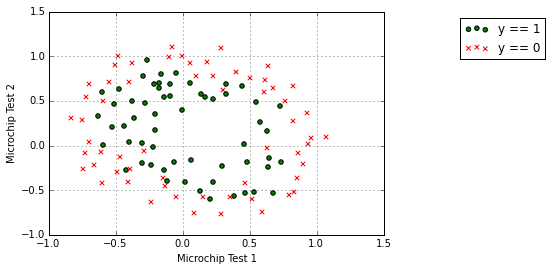

In [21]:
#%% ==================== Part 1: Plotting ====================
#%  We start the exercise by first plotting the data to understand the 
#%  the problem we are working with.
print('Plotting data with o indicating (y = 1) examples and x indicating (y = 0) examples.\n')
plotData(x, y)

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y == 1', 'y == 0'], bbox_to_anchor = (1.5, 1))
plt.show()

## Part 2: Compute Cost

In [22]:
# %% ============ Part 2: Compute Cost and Gradient ============

#% Add intercept term to x and X_test
print(x.shape)
X = mapFeature(x[:,0], x[:,1])

[m, n] = X.shape

# % Set regularization parameter lambda to 1
_lambda = 1

#% Initialize fitting parameters
initial_theta = np.zeros(n)

#% Compute and display initial cost and gradient
# cost = costFunction(initial_theta, X, y)
# [cost, grad] = costFunctionReg(initial_theta, X, y, _lambda)
cost = costFunctionReg(initial_theta, X, y, _lambda)
print('Cost at initial theta (zeros):\n{}'.format(cost))
print('Gradient at initial theta (zeros):\n{}'.format(initial_theta))
print(X.shape)

(118, 2)
Cost at initial theta (zeros):
0.69314718056
Gradient at initial theta (zeros):
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(118, 28)


## Part 3: Optimizing

Below showing 2 different functions (from `scipy.optimize`) which gives same results (well, essentially they are implementing the same algorithm :] ). Try out other methods "solver" with `minimize`, some (e.g. Powell) produces similar function value with less iterations and more evaluations.

In [23]:
# ============= Part 3: Optimizing using scipy.optimize
# %  In this exercise, you will use a function (scipy.optimize.minimize) 
# %  to find the optimal parameters theta.
fReg = lambda t: costFunctionReg(t, X, y, _lambda)

In [24]:
# Using minimize()
options = {'maxiter': 400, 'disp':True}
result = minimize(fReg, initial_theta, method='BFGS', options=options) # try other methods `Powell`, `SLSQP`..etc
cost = result['fun']
theta = result['x']

print('\nCost at theta found by minimize(): {}'.format(cost))
print('theta: {}'.format(theta))

Optimization terminated successfully.
         Current function value: 0.330077
         Iterations: 156
         Function evaluations: 4710
         Gradient evaluations: 157

Cost at theta found by minimize(): 0.330077170338
theta: [ 3.8184839   1.98622343  4.73555235 -5.63564475 -6.91339587 -5.97908991
  2.27804802  0.1397653   2.82830909 -2.77884061 -3.65603798  3.14089393
 -3.91617518 -1.93604552 -6.75916613 -1.83244173 -1.00180443  5.57556551
 -3.86001422 -4.76385851  3.23894781 -5.75483465  0.26162661 -0.83446057
  3.58545904 -4.93355713 -3.94769124  0.41442107]


In [25]:
# Using fmin_bfgs()
options = {'full_output': True, 'retall': True}
theta, cost, _, _, _, _, _, allvecs = fmin_bfgs(fReg, initial_theta, maxiter=400, **options)

print('\nCost at theta found by fmin_bfgs(): {}'.format(cost))
print('theta: {}'.format(theta))

Optimization terminated successfully.
         Current function value: 0.330077
         Iterations: 156
         Function evaluations: 4710
         Gradient evaluations: 157

Cost at theta found by fmin_bfgs(): 0.330077170338
theta: [ 3.8184839   1.98622343  4.73555235 -5.63564475 -6.91339587 -5.97908991
  2.27804802  0.1397653   2.82830909 -2.77884061 -3.65603798  3.14089393
 -3.91617518 -1.93604552 -6.75916613 -1.83244173 -1.00180443  5.57556551
 -3.86001422 -4.76385851  3.23894781 -5.75483465  0.26162661 -0.83446057
  3.58545904 -4.93355713 -3.94769124  0.41442107]


##### Visualize the cost function

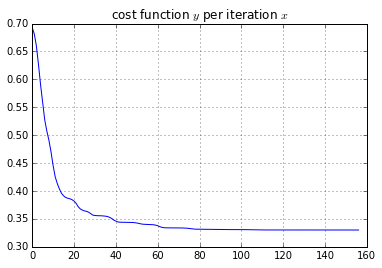

In [26]:
# visualizing the cost change
costs = [fReg(allvecs[i]) for i in range(157)]
plt.plot(costs)
plt.title('cost function $y$ per iteration $x$')
plt.grid();plt.show()

##### Plot the decision boundary

Cost at theta found by minimize():
0.330077170338

theta: 

[ 3.8184839   1.98622343  4.73555235 -5.63564475 -6.91339587 -5.97908991
  2.27804802  0.1397653   2.82830909 -2.77884061 -3.65603798  3.14089393
 -3.91617518 -1.93604552 -6.75916613 -1.83244173 -1.00180443  5.57556551
 -3.86001422 -4.76385851  3.23894781 -5.75483465  0.26162661 -0.83446057
  3.58545904 -4.93355713 -3.94769124  0.41442107]



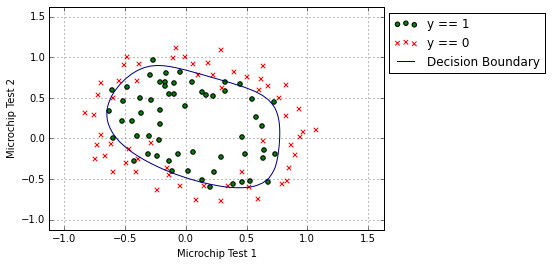

In [27]:
# % Print theta to screen
print('Cost at theta found by minimize():\n{}\n'.format(cost))
print('theta: \n')
print('{}\n'.format(theta))

# % Plot Boundary
plotDecisionBoundary(theta, X, y)

# % Show plot
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y == 1', 'y == 0', 'Decision Boundary'], bbox_to_anchor = (1.5, 1))
plt.show()

##### Accuracy

In [28]:
# % Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {}\n'.format(np.mean(np.double(p == y)) * 100))

Train Accuracy: 83.8983050847



<hr>
# Solutions

In [1]:
%matplotlib inline
from __future__ import division
from scipy.optimize import fmin
from scipy.optimize import fmin_bfgs
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# plotData() - Function to plot 2D classification data
def plotData(X, y):
    
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos,0], X[pos,1], c='g', marker='o')
    plt.scatter(X[neg,0], X[neg,1], c='r', marker='x')
    
    plt.grid()

<hr>
#### Hpothesis Representation

Before you start with the actual cost function, recall that the logistic regres- sion hypothesis is defined as:

$$h_\theta(x) = g(\theta^T x)$$


let:<br>
$z = \theta^T x$

then:<br>
$$g(z) = \frac{1}{1+e^{-z}}$$

Where,<br>
$\theta^T x = \theta_0 + \theta_1 . x_1 + \theta_2 . x_2$<br>

Our hypothesis should satisfy:

$0 \leq h_\theta(x) \leq 1 $

In [3]:
# sigmoid() - Sigmoid Function
def sigmoid(z):
    return 1 / (1 + math.e ** -z) # hypothesis

<hr>
#### Simplified Cost Function

In [4]:
# costFunction() - Logistic Regression Cost Function
def costFunction(theta, X, y):
    m = len(X)
    z = np.dot(X, theta.T)
    h = sigmoid(z)
    pos = np.dot(-y, np.log(h))
    neg = np.dot(1-y, np.log(1-h))
    cost = 1 / m * (pos - neg)
    return cost

`costFunction()` in math:<br>
$J(\theta) = \frac{1}{m} \displaystyle\sum_{i=1}^{m} [-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))]$

In [5]:
# costFunctionReg() - Regularized Logistic Regression Cost
def costFunctionReg(theta, X, y, _lambda):
    m = len(X)
    z = np.dot(X, theta.T)
    h = sigmoid(z)
    
    # cost 
    pos = np.dot(-y, np.log(h))
    neg = np.dot(1-y, np.log(1-h))
    cost = (pos - neg)
    
    # regularization term
    reg_para = (_lambda / (2 * m)) * sum([th**2 for th in theta[1:]])

    # cost with regularization
    costReg = (1. / m) * (cost + reg_para)
        
    return costReg

`costFunctionReg()` in math:<br>
$J(\theta) = \frac{1}{m} \displaystyle\sum_{i=1}^{m} [-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \displaystyle\sum_{j=1}^{n}\theta_j^2$

<sub>source: [ML:Logistic Regression](https://share.coursera.org/wiki/index.php/ML:Logistic_Regression)</sub>

In [6]:
# mapFeature() - Function to generate polynomial features
def mapFeature(x1, x2):
    degree = 6
    out = np.array([ x1 ** (i-j) * x2 ** j for i in range(degree+1) for j in range(i+1) ])
    return out.T

`mapFeature()` is similar to [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from `sklearn.preprocessing`.

In [7]:
# plotDecisionBoundary() - Function to plot classifier’s decision boundary
def plotDecisionBoundary(theta, X, y):
    
    plotData(X[:,1:], y)
    
    if len(X.T) <= 3:
        # linear boundary
        x = np.array([X[:,1].min(), X[:,1].max()])
        y = lambda x: (theta[0] + theta[1] * x) / - theta[2]

        plt.plot(x, y(x))
        plt.xlabel('Exam 1 score')
        plt.ylabel('Exam 2 score')
        plt.legend(['Decision boundary', 'y = 1', 'y = 0'], bbox_to_anchor = (1.5, 1))

    else:
        # non-linear boundary
        #% Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros(shape=(len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = (mapFeature(np.array(u[i]), np.array(v[j])).dot(np.array(theta)))
        z = z.T #% important to transpose z before calling contour
        #% Plot z = 0
        #% Notice you need to specify the range [0, 0]
        CS = plt.contour(u, v, z, 1)
        CS.collections[0].set_label('Decision Boundary')
        plt.xlabel('Microchip Test 1')
        plt.ylabel('Microchip Test 2')

To draw the **Decision Boundary**:<br>

For the **linear classifier**, remember that our main hypothesis is:

$h_\theta = \theta_0 + \theta_1 . x_1 + \theta_2 . x_2$

So, we can solve for $x_2$ in term of $x_1$ (or vice versa) to produce the boundary values. So we end up with:

$x_2 = \frac{\theta_0 + \theta_1 . x_1}{- \theta_2}$

For the **non-linear classifier**:

we plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1

In [8]:
# predict() - Logistic Regression Prediction Function
def predict(theta, X):
    m = len(X)
    p = np.zeros(m)
    
    predictions = sigmoid(np.dot(X, theta))
    pos = np.where(predictions >= 0.5)
    neg = np.where(predictions < 0.5)
    p[pos] = 1
    
    return p

To **predict**, use the following evaluations:

$h_\theta(x) \geq 0.5 \Longrightarrow y = 1$<br>
$h_\theta(x) \lt 0.5 \Longrightarrow y = 0$

Equally, we could use:

$\theta^T x \geq 0 \Longrightarrow y = 1$<br>
$\theta^T x \lt 0 \Longrightarrow y = 0$

<hr>
> By: Aziz Alto